## Imports

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2

from skimage.io import imread

## Retrieving the dataset from Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"osama1orabi","key":"3eec301fd02f1e0626905c382ec77fd1"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d weisinx7/stamps-dataset

 27% 6.00M/22.1M [00:00<00:00, 61.2MB/s]
100% 22.1M/22.1M [00:00<00:00, 136MB/s] 


In [ ]:
!mkdir stamps-dataset
!unzip stamps-dataset.zip -d stamps-dataset

Archive:  stamps-dataset.zip
  inflating: stamps-dataset/101a_0.bmp  
  inflating: stamps-dataset/101b_5.bmp  
  inflating: stamps-dataset/101c_10.bmp  
  inflating: stamps-dataset/101d_15.bmp  
  inflating: stamps-dataset/101e_20.bmp  
  inflating: stamps-dataset/101f_25.bmp  
  inflating: stamps-dataset/101g_30.bmp  
  inflating: stamps-dataset/101h_35.bmp  
  inflating: stamps-dataset/101i_40.bmp  
  inflating: stamps-dataset/103a_0.bmp  
  inflating: stamps-dataset/103b_5.bmp  
  inflating: stamps-dataset/103c_10.bmp  
  inflating: stamps-dataset/103d_15.bmp  
  inflating: stamps-dataset/103e_20.bmp  
  inflating: stamps-dataset/103f_25.bmp  
  inflating: stamps-dataset/103g_30.bmp  
  inflating: stamps-dataset/103h_35.bmp  
  inflating: stamps-dataset/103i_40.bmp  
  inflating: stamps-dataset/104a_0.bmp  
  inflating: stamps-dataset/104b_5.bmp  
  inflating: stamps-dataset/104c_10.bmp  
  inflating: stamps-dataset/104d_15.bmp  
  inflating: stamps-dataset/104e_20.bmp  
  inflating

## Cleaning the dataset

In [ ]:
import glob

In [ ]:
!ls /content/stamps-dataset/

ls: cannot access '/content/stamps-dataset/': No such file or directory


In [ ]:
SCANS_DIR = "/content/stamps-dataset/"
scan_files = glob.glob(SCANS_DIR + '*.bmp')
scan_files = sorted(scan_files)
len(scan_files)

0

In [ ]:
plt.figure(figsize=(100,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(imread(scan_files[i*20]))

NameError: ignored

In [ ]:
scan_files

['/content/stamps-dataset/101a_0.bmp',
 '/content/stamps-dataset/101b_5.bmp',
 '/content/stamps-dataset/101c_10.bmp',
 '/content/stamps-dataset/101d_15.bmp',
 '/content/stamps-dataset/101e_20.bmp',
 '/content/stamps-dataset/101f_25.bmp',
 '/content/stamps-dataset/101g_30.bmp',
 '/content/stamps-dataset/101h_35.bmp',
 '/content/stamps-dataset/101i_40.bmp',
 '/content/stamps-dataset/103a_0.bmp',
 '/content/stamps-dataset/103b_5.bmp',
 '/content/stamps-dataset/103c_10.bmp',
 '/content/stamps-dataset/103d_15.bmp',
 '/content/stamps-dataset/103e_20.bmp',
 '/content/stamps-dataset/103f_25.bmp',
 '/content/stamps-dataset/103g_30.bmp',
 '/content/stamps-dataset/103h_35.bmp',
 '/content/stamps-dataset/103i_40.bmp',
 '/content/stamps-dataset/104a_0.bmp',
 '/content/stamps-dataset/104b_5.bmp',
 '/content/stamps-dataset/104c_10.bmp',
 '/content/stamps-dataset/104d_15.bmp',
 '/content/stamps-dataset/104e_20.bmp',
 '/content/stamps-dataset/104f_25.bmp',
 '/content/stamps-dataset/104g_30.bmp',
 '/con

In [ ]:
label_list = [file.split('/')[-1].split('_')[0][:-1] for file in scan_files]
print(label_list)

['101', '101', '101', '101', '101', '101', '101', '101', '101', '103', '103', '103', '103', '103', '103', '103', '103', '103', '104', '104', '104', '104', '104', '104', '104', '104', '104', '105', '105', '105', '105', '105', '105', '105', '105', '105', '106', '106', '106', '106', '106', '106', '106', '106', '106', '107', '107', '107', '107', '107', '107', '107', '107', '107', '111', '111', '111', '111', '111', '111', '111', '111', '111', '112', '112', '112', '112', '112', '112', '112', '112', '112', '113', '113', '113', '113', '113', '113', '113', '113', '113', '116', '116', '116', '116', '116', '116', '116', '116', '116', '117', '117', '117', '117', '117', '117', '117', '117', '117', '120', '120', '120', '120', '120', '120', '120', '120', '120', '121', '121', '121', '121', '121', '121', '121', '121', '121', '123', '123', '123', '123', '123', '123', '123', '123', '123', '124', '124', '124', '124', '124', '124', '124', '124', '124', '125', '125', '125', '125', '125', '125', '125', '125'

In [ ]:
import os

test_image_list = []
train_image_list = scan_files[:]
images_to_remove = []

for file_path in scan_files:
    file_name = os.path.basename(file_path)
    if 'g' in file_name or 'h' in file_name or 'i' in file_name:
        test_image_list.append(file_path)
        images_to_remove.append(file_path)

for image_path in images_to_remove:
    train_image_list.remove(image_path)

test_label_list = [label_list[scan_files.index(image_path)] for image_path in test_image_list]
train_label_list = [label_list[scan_files.index(image_path)] for image_path in train_image_list]

print("Test Image List:", test_image_list)
print("Train Image List:", train_image_list)
print("Test Label List:", test_label_list)
print("Train Label List:", train_label_list)

Test Image List: ['/content/stamps-dataset/101g_30.bmp', '/content/stamps-dataset/101h_35.bmp', '/content/stamps-dataset/101i_40.bmp', '/content/stamps-dataset/103g_30.bmp', '/content/stamps-dataset/103h_35.bmp', '/content/stamps-dataset/103i_40.bmp', '/content/stamps-dataset/104g_30.bmp', '/content/stamps-dataset/104h_35.bmp', '/content/stamps-dataset/104i_40.bmp', '/content/stamps-dataset/105g_30.bmp', '/content/stamps-dataset/105h_35.bmp', '/content/stamps-dataset/105i_40.bmp', '/content/stamps-dataset/106g_30.bmp', '/content/stamps-dataset/106h_35.bmp', '/content/stamps-dataset/106i_40.bmp', '/content/stamps-dataset/107g_30.bmp', '/content/stamps-dataset/107h_35.bmp', '/content/stamps-dataset/107i_40.bmp', '/content/stamps-dataset/111g_30.bmp', '/content/stamps-dataset/111h_35.bmp', '/content/stamps-dataset/111i_40.bmp', '/content/stamps-dataset/112g_30.bmp', '/content/stamps-dataset/112h_35.bmp', '/content/stamps-dataset/112i_40.bmp', '/content/stamps-dataset/113g_30.bmp', '/conte

In [ ]:
from PIL import Image

resized_test_images = []
resized_train_images = []

for image_path in test_image_list:
    image = Image.open(image_path)
    resized_image = image.resize((224, 224))
    resized_test_images.append(resized_image)
    image.close()

for image_path in train_image_list:
    image = Image.open(image_path)
    resized_image = image.resize((224, 224))
    resized_train_images.append(resized_image)
    image.close()
print(resized_test_images)
print(resized_train_images)

[<PIL.Image.Image image mode=RGB size=224x224 at 0x7F69C24F0AF0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69C24AAE00>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69C24AB820>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDEE90>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDDF00>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDDED0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDF370>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDFE50>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDFE20>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDE560>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDF1F0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDF2B0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDF670>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDC310>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7F69BFDDF160>, <PIL.Image.Image image m

In [ ]:
plt.figure(figsize=(100,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(resized_train_images[i*20])

## Data analysis

## Retrainig EfficientNet

In [ ]:
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Not connected to a TPU runtime. Using CPU/GPU strategy


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(include_top=False, weights='imagenet', drop_connect_rate=0.4)

In [ ]:
image_tensors = [tf.convert_to_tensor(image) for image in resized_train_images]
ds_train = tf.data.Dataset.from_tensor_slices((image_tensors, train_label_tensors))
ds_train = ds_train.shuffle(buffer_size=1000)
ds_train = ds_train.batch(batch_size=32)
ds_train = ds_train.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
len(ds_train)

16

In [ ]:
image_tensors = [tf.convert_to_tensor(image) for image in resized_test_images]
ds_test = tf.data.Dataset.from_tensor_slices((image_tensors, test_label_tensors))
ds_test = ds_test.shuffle(buffer_size=1000)
ds_test = ds_test.batch(batch_size=32)
ds_test = ds_test.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
len(ds_test)

8

In [ ]:
ds_test

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

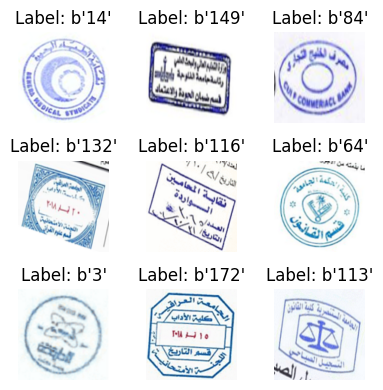

In [ ]:
for images, labels in ds_train.take(1):
    image_arrays = images.numpy()
    label_values = labels.numpy()
    fig, axes = plt.subplots(3, 3, figsize=(4, 4))
    axes = axes.flatten()
    for i in range(9):
        axes[i].imshow(image_arrays[i+2])
        axes[i].set_title("Label: {}".format(label_values[i+2]))
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

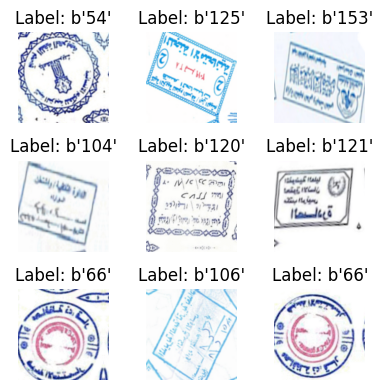

In [ ]:
for images, labels in ds_train.take(1):
    image_arrays = images.numpy()

    augmented_images = []
    for image in image_arrays[2:]:
        augmented_image = img_augmentation(tf.expand_dims(image, 0), training=True)
        augmented_images.append(augmented_image[0])

    augmented_images = tf.stack(augmented_images)

    fig, axes = plt.subplots(3, 3, figsize=(4, 4))
    axes = axes.flatten()

    for i in range(9):
        axes[i].imshow(augmented_images[i].numpy().astype("uint8"))
        axes[i].set_title("Label: {}".format(labels[i+2].numpy()))
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
from tensorflow.keras.applications import EfficientNetB0

with strategy.scope():
    inputs = layers.Input(shape=(224, 224, 3))
    x = img_augmentation(inputs)
    outputs = EfficientNetB0(include_top=True, weights=None, classes=120)(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

model.summary()

epochs = 40
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 img_augmentation (Sequentia  (None, 224, 224, 3)      0         
 l)                                                              
                                                                 
 efficientnetb0 (Functional)  (None, 120)              4203291   
                                                                 
Total params: 4,203,291
Trainable params: 4,161,268
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/40


ValueError: ignored

## Evaluation

## References

Articles:
- [EfficientNet: Improving Accuracy and Efficiency through AutoML and Model Scaling](https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html)
- [Image classification via fine-tuning with EfficientNet](https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/#transfer-learning-from-pretrained-weights)

Code:
- [Original EfficientNet GitHub](https://github.com/qubvel/efficientnet)
- [EfficientNet Tutorial GitHub](https://github.com/rom1504/image_embeddings)

Data:
- [Stamp verification dataset](https://www.kaggle.com/datasets/rtatman/stamp-verification-staver-dataset)
- [Stamps dataset](https://www.kaggle.com/datasets/weisinx7/stamps-dataset)